# TP de classification

Importation des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Charger les données

Les données doivent être téléchargées directement sur Kaggle : https://www.kaggle.com/rajyellow46/wine-quality

In [2]:
wine_df = pd.read_csv('winequalityN.csv', delimiter=',')

In [3]:
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## EDA - Exploratory data analysis

Explorer le dataset, regardez par exemple : 
    - les différents types de vins : combien en avons-nous de chaque sorte ?  
    - la distribution du pH  
    - le type des variables
    - ...

In [6]:
 wine_df.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

Visualiser le pH en fonction de fixed actidity

In [7]:
sns.scatterplot(wine_df["pH"], wine_df["fixed acidity"])

*Question* : que pouvez-vous en dire? Les variables sont corrélées?

## Nettoyage des données

Afin de gagner du temps sur cette phase de nettoyage, nous allons supprimer toutes les valeurs NaN du dataset et s'affranchir des futurs problèmes.

In [8]:
wine_df = wine_df.dropna()

In [9]:
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Predire le type de vin : la classification

## Simple Logistic regression

### Introduction

Essayons de créer un modèle de régression logistique simple.  
Nous devons donc dans un premier temps séparer le X (les variables explicatives) et le Y (la variable à expliquer/prédire).  

In [10]:
X = wine_df[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]
y = wine_df['type']

Puis, comme pour un problème de régression, séparer le dataset en Train et Test. 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

*Question* : En classification, comment évaluons-nous la performance d'un modèle?

Score : le pourcentage de bonnes prédictions

Lancons maintenant nos modèles de régression logistique simple.  
Pour ce faire, essayez différentes paires de data sets :  (pH, type), (fixed acidity, type), (alcohol, type)

### pH/Type

Redéfinissez votre X et y avec les bonnes variables

In [12]:
X = wine_df[['pH']]
y = wine_df['type']

In [13]:
X

,pH
0,3.00
1,3.30
2,3.26
3,3.19
4,3.19
...,...
6491,3.42
6492,3.45
6494,3.42
6495,3.57


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

Lancez votre régression logistique 

In [15]:
# Instanciation of LogisticRegression. Need to add max_iter=1600, or we will have an error of max iteration
logistic_regression= LogisticRegression(max_iter=1600)

# Train our model with splitted values
logistic_regression.fit(X_train,y_train)

# Prediction of our y, using Logistic Regression
y_pred=logistic_regression.predict(X_test)

# See the score of our testing values (accuracy)
score = logistic_regression.score(X_test, y_test)
score

0.7555440948942754

*Question* : a votre avis, qu'est-ce que signifie ce score ?

Evaluer votre modèle avec une matrice de confusion 

In [16]:
cm1=metrics.confusion_matrix(y_test, y_pred)
cm1
ax=sns.heatmap(cm1, annot=True,fmt='g', cmap="YlGnBu")
ax.set_title('Confusion Matrix Wine Quality');
ax.set_xlabel('Predicted type')
ax.set_ylabel('Actual type');

ax.xaxis.set_ticklabels(['white', 'red'])
ax.yaxis.set_ticklabels(['white', 'red'])

[Text(0, 0.5, 'white'), Text(0, 1.5, 'red')]

*Question* : que pouvez-vous en dire ? 

### alcohol/Type

In [17]:
## Répétez toutes les lignes précédentes



### fixed acidity/type

In [18]:
## Répétez toutes les lignes précédentes

*Question* : Quelle paire performe le mieux

## Multi logistic regression

Ajoutez de nouvelles features dans votre modèle (= votre X peut contenir plusieurs variables explicatives)  
Testez vos modèles et trouvez le plus performant !

In [19]:
wine_df = wine_df.dropna()

In [20]:
# Define X and y with our df values
X = wine_df[['fixed acidity','pH','sulphates']]
y = wine_df['type']

X

,fixed acidity,pH,sulphates
0,7.0,3.00,0.45
1,6.3,3.30,0.49
2,8.1,3.26,0.44
3,7.2,3.19,0.40
4,7.2,3.19,0.40
...,...,...,...
6491,6.8,3.42,0.82
6492,6.2,3.45,0.58
6494,6.3,3.42,0.75
6495,5.9,3.57,0.71


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [22]:
# Instanciation of LogisticRegression. Need to add max_iter=1600, or we will have an error of max iteration
logistic_regression= LogisticRegression(max_iter=1600)

# Train our model with splitted values
logistic_regression.fit(X_train,y_train)

# Prediction of our y, using Logistic Regression
y_pred=logistic_regression.predict(X_test)

# See the score of our testing values (accuracy)
score = logistic_regression.score(X_test, y_test)
score

0.8813821557503868

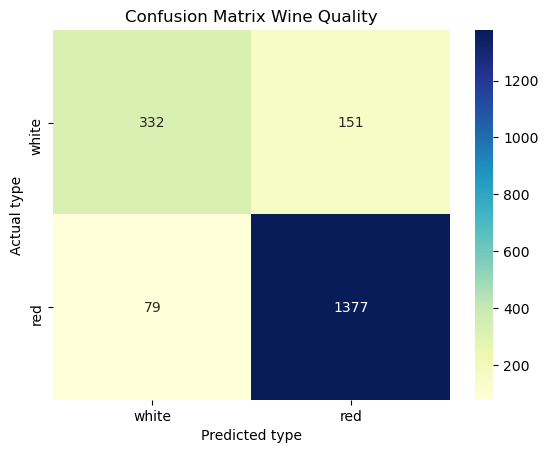

In [26]:
cm1=metrics.confusion_matrix(y_test, y_pred)
cm1
ax=sns.heatmap(cm1, annot=True,fmt='g', cmap="YlGnBu")
ax.set_title('Confusion Matrix Wine Quality');
ax.set_xlabel('Predicted type')
ax.set_ylabel('Actual type');

ax.xaxis.set_ticklabels(['white', 'red'])
ax.yaxis.set_ticklabels(['white', 'red'])
plt.show()